# American Time Use Survey(ATUS) Analysis

## - Sheldon Sebastian
---

![](images/Banner.jpg)

*Time is the only true unit of measure. It gives proof to the existence of matter. Without time, we don't exist.*

The American Time Use Survey (ATUS) is the Nation’s first federally administered, *continuous survey on time use in the United States.* The goal of the survey is to measure how people divide their time among life’s activities.


In ATUS, individuals are randomly selected from a subset of households that have completed their eighth and final month of interviews for the Current Population Survey (CPS). ATUS respondents are interviewed only one time about how they spent their time on the previous day, where they were, and whom they were with. The survey is sponsored by the Bureau of Labor Statistics and is conducted by the U.S. Census Bureau.

The major purpose of ATUS is to develop nationally representative estimates of how people spend their time. The *inspiration* behind this project analysis is to understand how daily activities differ by employment status, income, gender, etc.

---------

# Table of Content <a id="toc"></a>

## 1. [Source and Description of Data](#source_data)
## 2. [Preprocessing and Cleaning](#cleaning_data)
## 3. [Summary Statistics](#summary_statistics)
## 4. Utility Functions
   ### 4.1 [Get Average Time by Weightage](#avgWeightHours)
   ### 4.2 [Get Average Time by Weightage and GroupBy](#avgWeightHoursGroupBy)
   ### 4.3 [Get Participation Percentage by Weightage](#participationWeight)
   ### 4.4 [Get Participation Percentage by Weightage and GroupBy](#participationWeightGroupBy)
## 5. Analysis
   ### 5.1. [Which is most performed activity based on Time spent and Frequency of doing it?](#5.1)
   ### 5.2. [On the basis of activities, where do respondents spend most of their time?](#5.2)
   ### 5.3. [How do respondents spend their time based on employment status?](#5.3)
   ### 5.4. [How do respondents in different industries spend their time?](#5.4)
   ### 5.5. [How do respondents spend their time, and with whom based on marital status?](#5.5)
   ### 5.6. [How do respondents in different income categories spend their time?](#5.6)
   ### 5.7. [How do respondents in different age categories spend their time?](#5.7)
   ### 5.8. [ How do respondents spend their time, and with whom do they spend it based on Gender?](#5.8)
## 6. [Conclusion](#conclusion)
-------

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt

## 1. Source and Description of data <a id="source_data"></a>

This data is downloaded from kaggle and can be found [here](https://www.kaggle.com/bls/american-time-use-survey), this data is also available from the official [Bureau of Labor Statistics website](https://www.bls.gov/tus/datafiles_0315.htm). The *user manual* for ATUS data can be found [here](https://www.bls.gov/tus/atususersguide.pdf) and the *dictionary* for meaning of each variable for ATUS can be found [here](https://www.bls.gov/tus/atusintcodebk0315.pdf) and dictionary for meaning of each variable in CPS can be found [here](https://www.bls.gov/tus/atuscpscodebk0315.pdf).

The survey data is collected from **2003 to 2015**. In our current dataset we have information for **170,842** American respondents. 

We have 2 datasets, connected by a common primary key:

**1. Respondent Information:**

The respondent information dataset contains the respondent's age, gender, marital status, employment status, income and employment industry. 

First few rows are as follows:

In [2]:
respondentDataCleaned = pd.read_csv("data/respondentDataCleaned.csv", low_memory=False)
respondentDataCleaned.head()

,unique id,Generalized industry code,Weightage,Respondent Labour Status,Yearly Family income category (in dollars),Marriage Status,Sex,Age
0,20030100013280,Educational and health services,8155463.0,Employed,"50,000 to 99,999",Married,Male,60
1,20030100013344,Manufacturing,1735323.0,Employed,NaN,Married,Female,41
2,20030100013352,Educational and health services,3830528.0,Employed,"50,000 to 99,999",Married,Female,26
3,20030100013848,NaN,6622023.0,Unemployed,"10,000 to 24,999",Married,Female,36
4,20030100014165,Educational and health services,3068387.0,Employed,"50,000 to 99,999",Married,Male,51


**2. Activity Data**:

The activity dataset contains information about the activity performed by respondent, where the respondent was and with whom when performing the activity. We also have the **weightage** column for the respondent. Since the survey are catered to various demographics we have weightage for each respondent's response to avoid skewed results.

First few rows are as follows:

In [3]:
activityDataCleaned = pd.read_csv("data/activityDataCleaned.csv")
activityDataCleaned.head()

,unique id,activity serial number,minutes of activity,Activity Category,Location of activity,Activity Partner,Weightage
0,20030100013280,1,60,"Sports, Exercise, & Recreation",Outdoors away from home,Alone,8155463.0
1,20030100013280,2,30,Personal Care Activities,NaN,NaN,8155463.0
2,20030100013280,3,600,Personal Care Activities,NaN,NaN,8155463.0
3,20030100013280,4,150,"Socializing, Relaxing, and Leisure",Respondent's home or yard,Alone,8155463.0
4,20030100013280,5,5,Eating and Drinking,Respondent's home or yard,Spouse,8155463.0


[Back to table of contents](#toc)

## 2. Preprocessing and Cleaning  <a id="cleaning_data"></a>

The preprocessing and cleaning information can be found separately in another notebook titled, "**American Time Use Survey Cleaning and Preprocessing**".

[Back to table of contents](#toc)

## 3. Summary Statistics <a id="summary_statistics"></a>

We will perform a quick summary statistics for respondent information and activity data.

Converting every column in **respondent** dataframe to appropriate data type.

In [4]:
# converting to appropriate data type
respondentDataCleaned["unique id"] = respondentDataCleaned["unique id"].astype(
    "category"
)
respondentDataCleaned["Sex"] = respondentDataCleaned["Sex"].astype("category")
respondentDataCleaned["Respondent Labour Status"] = respondentDataCleaned[
    "Respondent Labour Status"
].astype("category")
respondentDataCleaned["Generalized industry code"] = respondentDataCleaned[
    "Generalized industry code"
].astype("category")
respondentDataCleaned["Marriage Status"] = respondentDataCleaned[
    "Marriage Status"
].astype("category")
respondentDataCleaned[
    "Yearly Family income category (in dollars)"
] = respondentDataCleaned["Yearly Family income category (in dollars)"].astype(
    "category"
)

This is summary statistics for respondent's numerical variables.

In [5]:
respondentDataCleaned.describe()

,Weightage,Age
count,1.708420e+05,170842.000000
mean,6.670430e+06,46.894364
std,6.147646e+06,17.701637
min,4.194717e+05,15.000000
25%,2.771238e+06,33.000000
50%,4.927148e+06,46.000000
75%,8.184476e+06,60.000000
max,1.370000e+08,85.000000


This is summary statistics for respondent's categorical variables.

In [6]:
respondentDataCleaned.describe(include="category")

,unique id,Generalized industry code,Respondent Labour Status,Yearly Family income category (in dollars),Marriage Status,Sex
count,170842,106622,114997,88627,170842,170842
unique,170842,13,2,6,5,2
top,20151212152498,Educational and health services,Employed,"50,000 to 99,999",Married,Female
freq,1,26146,106622,30369,86654,96201


Converting every column in **activity** dataframe to appropriate data type.

In [7]:
activityDataCleaned["unique id"] = activityDataCleaned["unique id"].astype("category")
activityDataCleaned["activity serial number"] = activityDataCleaned[
    "activity serial number"
].astype("category")
activityDataCleaned["Activity Category"] = activityDataCleaned[
    "Activity Category"
].astype("category")
activityDataCleaned["Location of activity"] = activityDataCleaned[
    "Location of activity"
].astype("category")
activityDataCleaned["Activity Partner"] = activityDataCleaned[
    "Activity Partner"
].astype("category")

This is summary statistics for activity's numerical variables.

In [8]:
activityDataCleaned.describe()

,minutes of activity,Weightage
count,4.322654e+06,4.322654e+06
mean,6.972668e+01,6.381710e+06
std,9.474643e+01,5.826659e+06
min,1.000000e+00,4.194717e+05
25%,1.500000e+01,2.701216e+06
50%,3.000000e+01,4.747918e+06
75%,8.500000e+01,7.784970e+06
max,1.313000e+03,1.370000e+08


This is summary statistics for activity's categorical variables.

In [9]:
activityDataCleaned.describe(include="category")

,unique id,activity serial number,Activity Category,Location of activity,Activity Partner
count,4322654,4322654,4322654,3710990,3619926
unique,170842,91,18,26,25
top,20130201130673,6,Traveling,Respondent's home or yard,Alone
freq,210,219719,877016,1866293,1203677


[Back to table of contents](#toc)

## 4. Utility Functions

Utility functions to help coding and enhance code reusability.

## 4.1 Get Average Time by Weightage <a id= "avgWeightHours"></a>

Since ATUS respondents have weightage associated with them, we compute the average time spent with help of the weightage formula described in **ATUS user manual**.

![](images/TimeFormula.png)

In [10]:
# average daily minutes spent
def getAverageHours(dataframeObject, columnName):
    # create empty dataframe
    emptyDF = pd.DataFrame()
    nameList = []
    sumList = []

    for name, eachGroup in dataframeObject.groupby(columnName, observed=True):
        if sum(eachGroup["Weightage"]) > 0:
            # name of activity
            nameList.append(name)

            # average time formula
            sumList.append(
                sum(eachGroup["minutes of activity"] * eachGroup["Weightage"])
                / sum(eachGroup["Weightage"])
            )

    emptyDF["Activity"] = nameList
    emptyDF["Weighted Minutes"] = sumList

    # sort the activities in descending order
    return emptyDF.sort_values("Weighted Minutes", ascending=False)

[Back to table of contents](#toc)

## 4.2 Get Average Time by Weightage and GroupBy <a id ="avgWeightHoursGroupBy"></a>

This Utility function first **groups** the dataframe by the argument passed to it and then computes average time for *each group* using the utility function described in section 4.1

In [11]:
# average daily minutes spent
def getAverageHoursGroupedBy(dataFrameObject, groupColumn1, groupColumn2, limit=3):
    eachRowList = []

    # group by the column name
    for name, eachGroup in dataFrameObject.groupby(groupColumn1):

        # compute weighted time for each group
        weightedDf = getAverageHours(eachGroup, groupColumn2)

        # return the top results for each group based on limit specified
        rangeLimit = limit if limit < len(weightedDf) else len(weightedDf)

        for i in range(rangeLimit):
            dictionaryInfo = {}
            dictionaryInfo.update(
                Group=name,
                Activity=weightedDf.iloc[i]["Activity"],
                Weighted_Minutes=weightedDf.iloc[i]["Weighted Minutes"],
            )

            # store all the results for each group in common dataframe
            eachRowList.append(dictionaryInfo)

    return pd.DataFrame(eachRowList).set_index(["Group", "Activity"])

[Back to table of contents](#toc)

## 4.3 Get Participation Percentage by Weightage <a id ="participationWeight"></a>

Since ATUS respondents have weightage associated with them, we compute the participation percentage of each activity with help of the percentage formula described in **ATUS user manual**.

![](images/ParticipationFormula.png)

In [12]:
# average participation percentage
def getParticipationPercentage(dataframeObject, columnToAggregate):
    # create empty dataframe
    emptyDF = pd.DataFrame()
    nameList = []
    sumList = []

    # sum of all weights
    totalSum = sum(dataframeObject["Weightage"])

    for name, eachGroup in dataframeObject.groupby(columnToAggregate, observed=True):
        # name of activity
        nameList.append(name)

        # percentage formula
        sumList.append((sum(eachGroup["Weightage"]) / totalSum) * 100)

    emptyDF["Activity"] = nameList
    emptyDF["Participation Percentage"] = sumList

    # sort the activities in descending order
    return emptyDF.sort_values("Participation Percentage", ascending=False)

[Back to table of contents](#toc)

## 4.4 Get Participation Percentage by Weightage and GroupBy <a id ="participationWeightGroupBy"></a>

This Utility function first **groups** the dataframe by the argument passed to it and then computes percentage for *each group* using the utility function described in section 4.3

In [13]:
# average participation percentage grouped
def getParticipationPercentageGroupedBy(
    dataFrameObject, groupColumn1, groupColumn2, limit=3
):
    eachRowList = []

    # group by the column name
    for name, eachGroup in dataFrameObject.groupby(groupColumn1, observed=True):

        # compute weighted percentage for each group
        weightedDf = getParticipationPercentage(eachGroup, groupColumn2)

        # return the top results for each group based on limit specified
        rangeLimit = limit if limit < len(weightedDf) else len(weightedDf)

        for i in range(rangeLimit):
            dictionaryInfo = {}
            dictionaryInfo.update(
                Group=name,
                Activity=weightedDf.iloc[i]["Activity"],
                Percentage=weightedDf.iloc[i]["Participation Percentage"],
            )

            # store all the results for each group in common dataframe
            eachRowList.append(dictionaryInfo)

    return pd.DataFrame(eachRowList).set_index(["Group", "Activity"])

[Back to table of contents](#toc)

---------------------

## 5. Analysis 

## 5.1. Which is most performed activity based on Time spent and Frequency of doing it? <a id="5.1"></a>

We want to know which is the most performed activity based on average time spent doing it. 

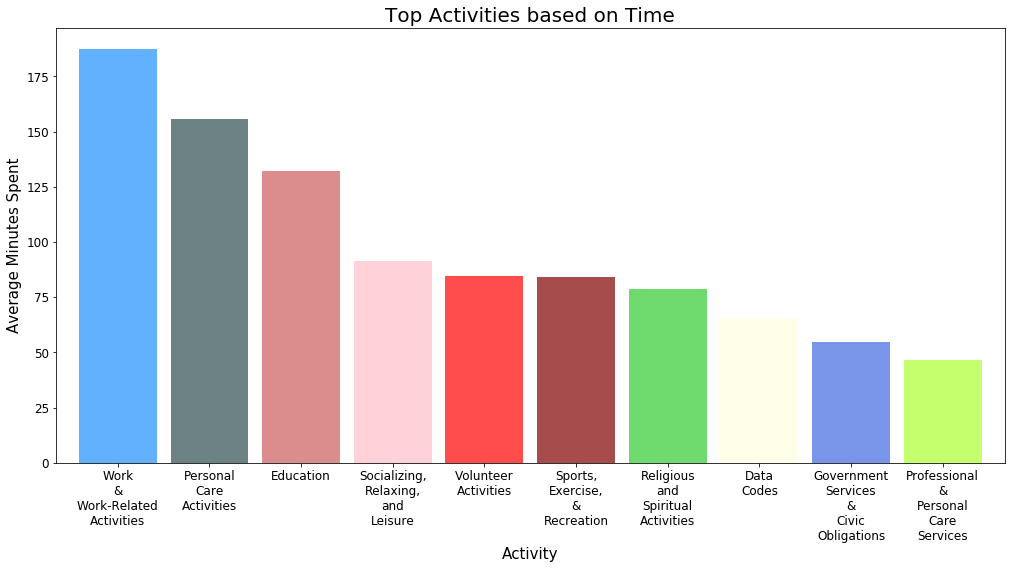

In [14]:
# get average time spent on activity using utility function
topActvity = getAverageHours(activityDataCleaned, "Activity Category").head(10)

# create bar plots
topTime = topActvity.plot.bar(
    figsize=(17, 8),
    title="Top Activities based on Time",
    x="Activity",
    y="Weighted Minutes",
    legend=False,
    fontsize=12,
    alpha=0.7,
    width=0.85,
    color=[
        "#1E90FF",
        "#2F4F4F",
        "#CD5C5C",
        "#FFC0CB",
        "red",
        "#800000",
        "#32CD32",
        "#FFFFE0",
        "#4169E1",
        "#ADFF2F",
    ],
)

# set the x ticks
topTime.set_xticklabels(
    # to wrap text, replace all spaces with new lines
    [x.replace(" ", "\n") for x in topActvity["Activity"]],
    rotation=0,
)

# set x axis label
topTime.set_xlabel("Activity", fontsize=15)

# set y axis label
topTime.set_ylabel("Average Minutes Spent", fontsize=15)

# set size of title
topTime.title.set_size(20)

plt.show()

Based on the above bar chart we notice, that most time spent doing an activity is work or work-related activities, followed by personal care activities which include grooming tasks, followed by education category which includes learning or taking classes, followed by socializing and relaxing activities.

*Note*: Here Data Codes category means the unaccounted time which the respondent does not remember.

Now, we want to know which is the most performed activity based on the frequency of doing it. 

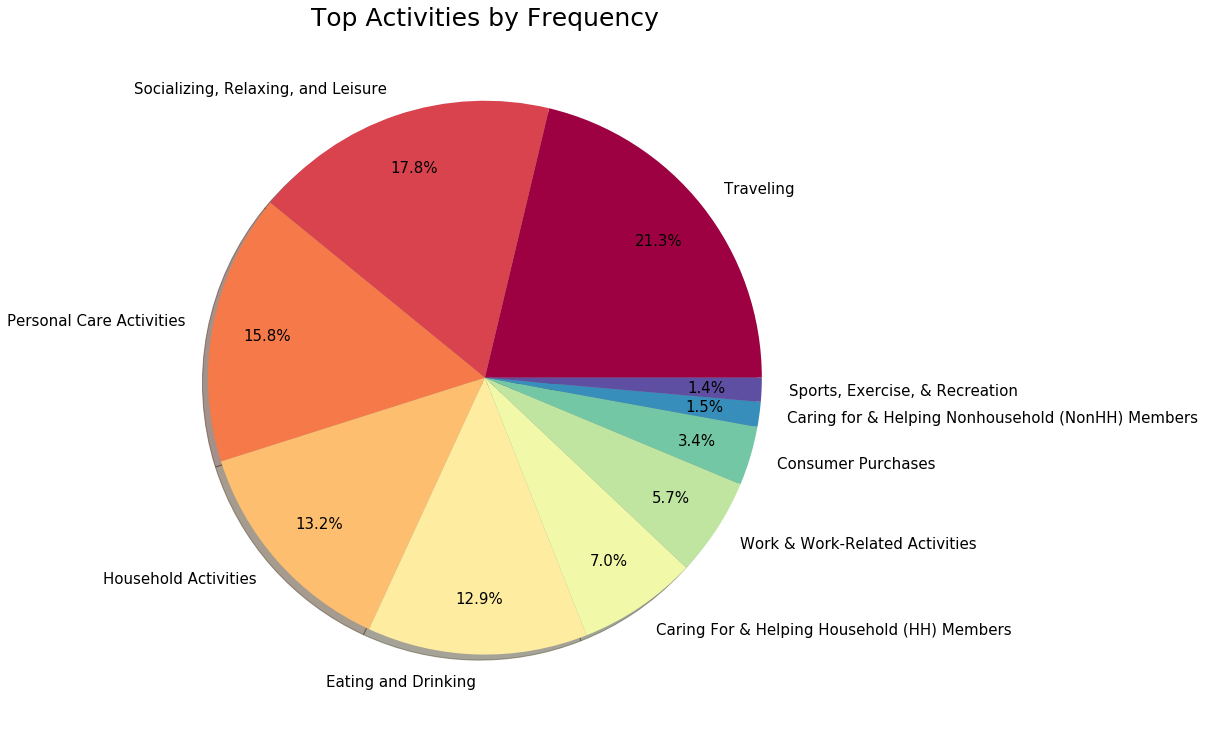

In [15]:
# get percentage of activity using utility function
topActivityFreq = (
    getParticipationPercentage(activityDataCleaned, "Activity Category")
    .set_index("Activity")
    .head(10)  # return only top 10 results
)

# create pie chart
freqPie = topActivityFreq.plot.pie(
    y="Participation Percentage",
    figsize=(15, 13),
    legend=False,
    title="Top Activities by Frequency",
    fontsize=15,
    autopct="%1.1f%%",
    pctdistance=0.8,
    colormap="Spectral",
    shadow=True,
)

freqPie.set_ylabel("")
freqPie.title.set_size(25)

plt.tight_layout()

plt.show()

Based on the above pie chart we notice, that the most frequent activity is Traveling, followed by Socializing, Personal Care Activities, Household activities, and Eating and Drinking activities.

[Back to table of contents](#toc)

--------------------------
## 5.2. On the basis of activities, where do respondents spend most of their time? <a id="5.2"></a>

We want to find out where do respondents spend most of their time when performing an activity.

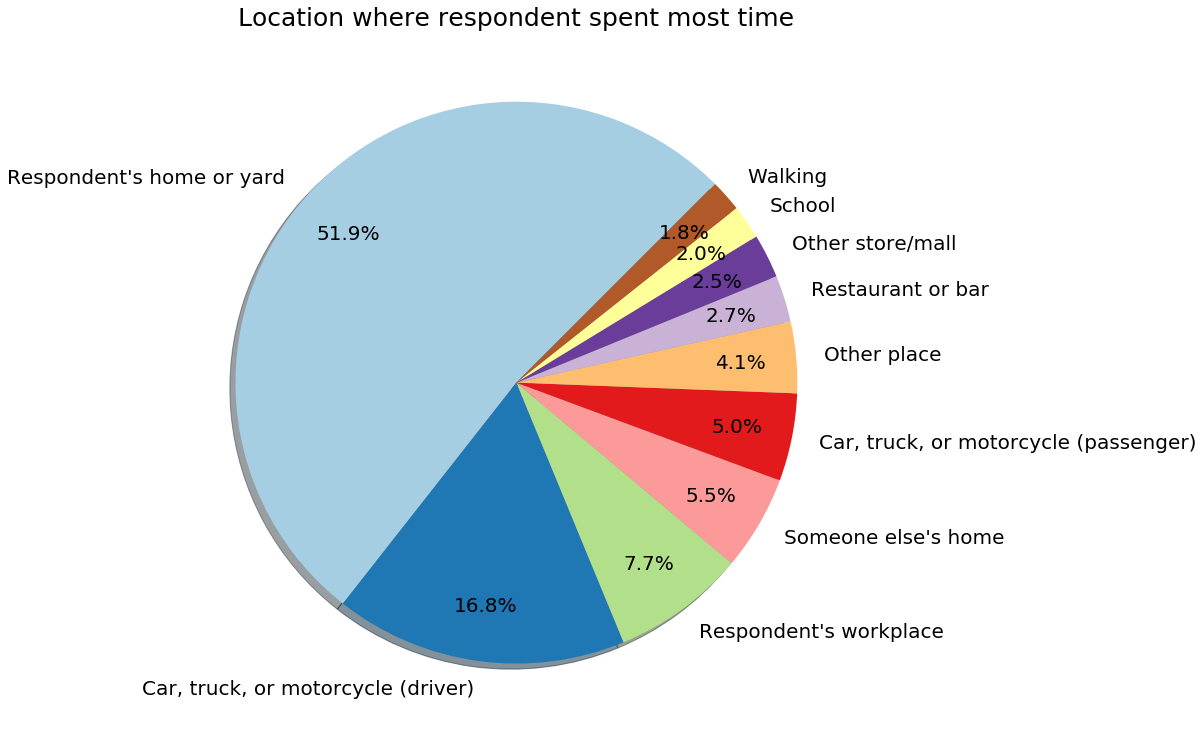

In [16]:
# get percentage of activity using utility function
respLocation = (
    getParticipationPercentage(activityDataCleaned, "Location of activity")
    .set_index("Activity")
    .head(10)
)

# create pie chart
locationPie = respLocation.plot.pie(
    y="Participation Percentage",
    figsize=(15, 13),
    legend=False,
    title="Location where respondent spent most time",
    fontsize=20,
    autopct="%1.1f%%",
    pctdistance=0.8,
    colormap="Paired",
    startangle=45,
    shadow=True,
)

# remove the y axis label
locationPie.set_ylabel("")

# set title size
locationPie.title.set_size(25)

plt.tight_layout()
plt.show()

On examining the above pie chart we learn that respondents perform a majority of activities at home, followed by driving in a vehicle, being at the workplace, being at someone else's home. 

[Back to table of contents](#toc)

-----------------------------------------

## 5.3. How do respondents spend their time based on employment status? <a id="5.3"></a>

We want to know the top 5 activities in which most time was spent based on respondent's employment status.

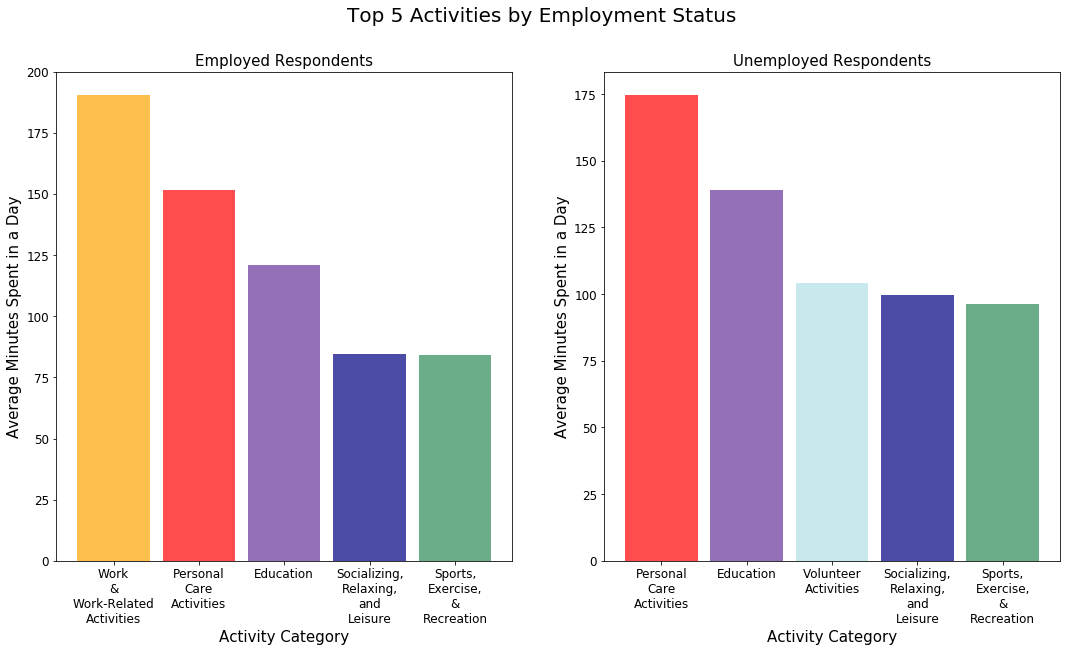

In [17]:
# get all unique ids for employed respondents
employedIds = respondentDataCleaned.loc[
    respondentDataCleaned["Respondent Labour Status"] == "Employed", "unique id"
]

# get employed respondents activities
employedRespondents = activityDataCleaned[
    activityDataCleaned["unique id"].isin(employedIds)
]

# get top 5 activity by time spent for employed respondent
employedRespondentsHours = getAverageHours(
    employedRespondents, "Activity Category"
).head(5)

# get all unique ids for unemployed respondents
unemployedIds = respondentDataCleaned.loc[
    respondentDataCleaned["Respondent Labour Status"] == "Unemployed", "unique id"
]

# get unemployed respondents activities
unemployedRespondents = activityDataCleaned[
    activityDataCleaned["unique id"].isin(unemployedIds)
]

# get top 5 activity by time spent for unemployed respondent
unemployedRespondentsHours = getAverageHours(
    unemployedRespondents, "Activity Category"
).head(5)

# create subplot containing 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))

# 1st subplot
axempl = employedRespondentsHours.plot(
    kind="bar",
    x="Activity",
    y="Weighted Minutes",
    ax=axes[0],  # this is index of 1st subplot
    title="Employed Respondents",
    legend=False,
    fontsize=12,
    color=["orange", "red", "rebeccapurple", "navy", "seagreen"],
    alpha=0.7,
    width=0.85,
)
axempl.set_xticklabels(
    # to wrap text, replace all spaces with new lines
    [x.replace(" ", "\n") for x in employedRespondentsHours["Activity"].to_list()],
    rotation=0,
)
axempl.set_xlabel("Activity Category", fontsize=15)
axempl.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
axes[0].title.set_size(15)

# 2nd subplot
axunemp = unemployedRespondentsHours.plot(
    kind="bar",
    x="Activity",
    y="Weighted Minutes",
    ax=axes[1],  # this is index of 2nd subplot
    title="Unemployed Respondents",
    legend=False,
    fontsize=12,
    color=["red", "rebeccapurple", "powderblue", "navy", "seagreen"],
    alpha=0.7,
    width=0.85,
)
axunemp.set_xticklabels(
    # to wrap text, replace all spaces with new lines
    [x.replace(" ", "\n") for x in unemployedRespondentsHours["Activity"].to_list()],
    rotation=0,
)
axunemp.set_xlabel("Activity Category", fontsize=15)
axunemp.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
axes[1].title.set_size(15)

# set title of entire subplot
fig.suptitle("Top 5 Activities by Employment Status", size=20)

plt.show()

From the above subplot, we notice that employed respondent spends most of their time doing work-related activities, whereas an unemployed respondent spends most of their time doing personal care activities. We also notice that unemployed respondents spend significant amount of time doing volunteering activities.

[Back to table of contents](#toc)

--------------------------
## 5.4. How do respondents in different industries spend their time? <a id="5.4"></a>

We want to know the top 3 activities in which most time was spent based on respondents industries.

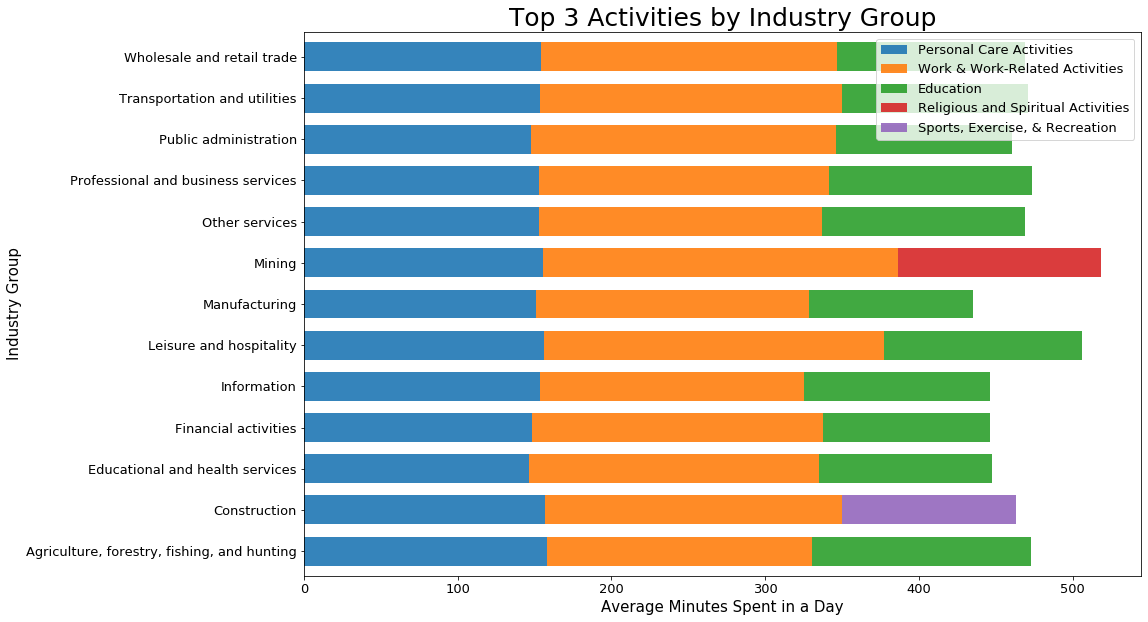

In [18]:
# add industry code from respondent dataframe into activity dataframe
industryResp = activityDataCleaned.merge(
    respondentDataCleaned[["unique id", "Generalized industry code"]], on="unique id"
)

# get top 3 activity by average time grouped by Industry code using utility function
industryRespGroup = getAverageHoursGroupedBy(
    industryResp, "Generalized industry code", "Activity Category", 3
).unstack()

# reposition the columns
industryRespGroup = industryRespGroup[
    [
        ("Weighted_Minutes", "Personal Care Activities"),
        ("Weighted_Minutes", "Work & Work-Related Activities"),
        ("Weighted_Minutes", "Education"),
        ("Weighted_Minutes", "Religious and Spiritual Activities"),
        ("Weighted_Minutes", "Sports, Exercise, & Recreation"),
    ]
]

# plot horizontal stacked bar chart
axindustry = industryRespGroup.plot.barh(
    stacked=True,
    figsize=(15, 10),
    legend=True,
    width=0.7,
    alpha=0.9,
    fontsize=13,
    title="Top 3 Activities by Industry Group",
)

axindustry.set_ylabel("Industry Group", fontsize=15)
axindustry.set_xlabel("Average Minutes Spent in a Day", fontsize=15)

# create legend
axindustry.legend(
    [
        "Personal Care Activities",
        "Work & Work-Related Activities",
        "Education",
        "Religious and Spiritual Activities",
        "Sports, Exercise, & Recreation",
    ],
    loc="upper right",
    frameon=True,
    fontsize=13,
)

# set title of bar chart
axindustry.title.set_size(25)

plt.show()

From the above charts, we notice that all industries have the top 3 activities as Personal Care, Work, Education, except for Mining and Construction industries. In the mining industry, the top 3 activities are personal care, work, and religious activities, and for construction industry personal care, work and Sports, Exercise and recreational activities were top 3.

We also observe that respondents from mining and hospitality industries spend more time working in comparison to other industries.

[Back to table of contents](#toc)

--------------------------
## 5.5. How do respondents spend their time, and with whom based on marital status? <a id="5.5"></a>

We want to know the top 5 activities in which most time was spent based on respondents marital status.

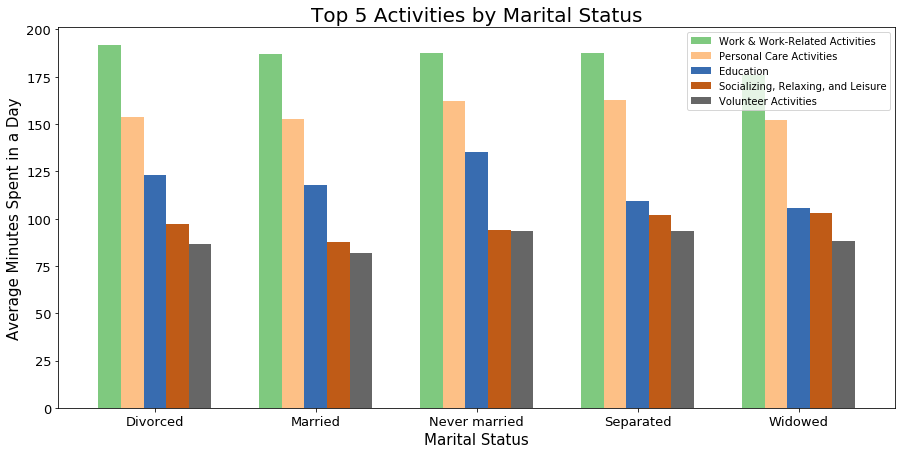

In [19]:
# add marital status from respondent dataframe into activity dataframe
maritalResp = activityDataCleaned.merge(
    respondentDataCleaned[["unique id", "Marriage Status"]]
)

# get top 5 activities by average time grouped by marital status using utility function
maritalRespGroup = getAverageHoursGroupedBy(
    maritalResp, "Marriage Status", "Activity Category", 5
).unstack()

# reposition the columns
maritalRespGroup = maritalRespGroup[
    [
        ("Weighted_Minutes", "Work & Work-Related Activities"),
        ("Weighted_Minutes", "Personal Care Activities"),
        ("Weighted_Minutes", "Education"),
        ("Weighted_Minutes", "Socializing, Relaxing, and Leisure"),
        ("Weighted_Minutes", "Volunteer Activities"),
    ]
]

# plot grouped bar charts
axmarital = maritalRespGroup.plot.bar(
    figsize=(15, 7),
    legend=True,
    width=0.7,
    fontsize=13,
    title="Top 5 Activities by Marital Status",
    colormap="Accent",
    rot=0,
)

axmarital.set_xlabel("Marital Status", fontsize=15)
axmarital.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
axmarital.legend(
    [
        "Work & Work-Related Activities",
        "Personal Care Activities",
        "Education",
        "Socializing, Relaxing, and Leisure",
        "Volunteer Activities",
    ],
    loc="best",
    frameon=True,
)
axmarital.title.set_size(20)

plt.show()

We notice that respondents who have never been married spend most of their time in educational activities, whereas married respondents spend least amount of time in volunteering activities.

We want to know the top 5 people interacted with while performing tasks based on respondents marital status.

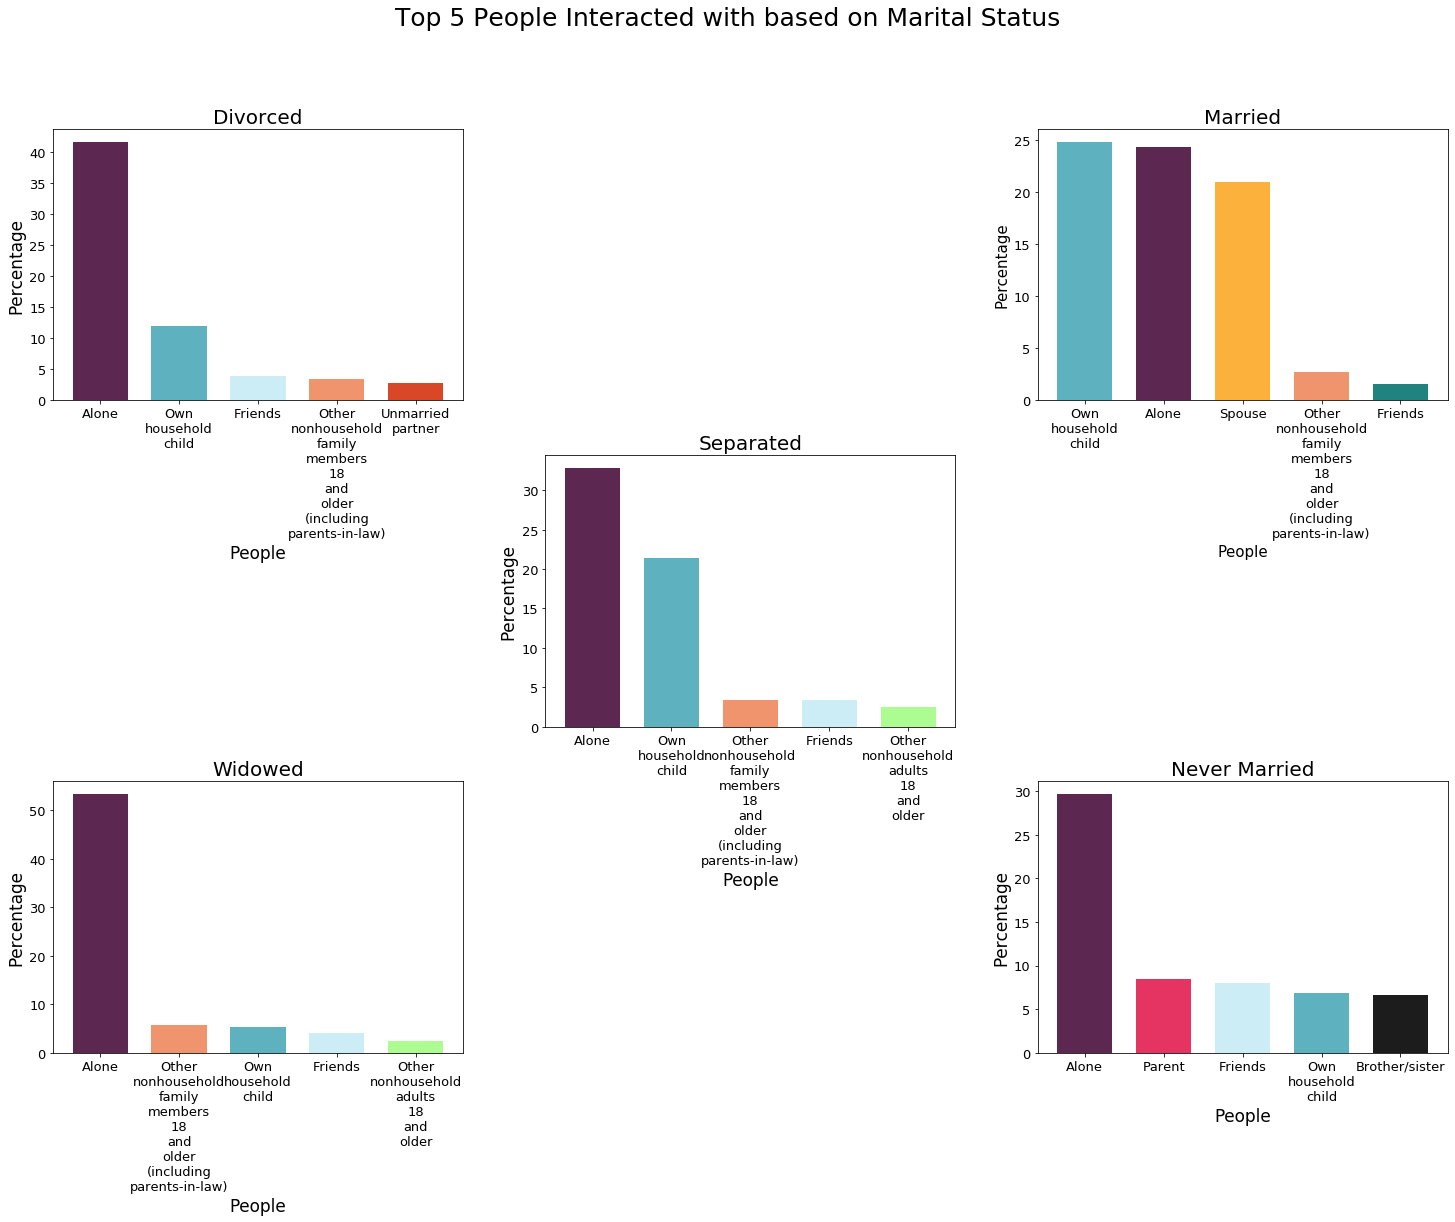

In [20]:
# get top 5 partner activities grouped by marital status using utility function
maritalParticipation = getParticipationPercentageGroupedBy(
    maritalResp, "Marriage Status", "Activity Partner", 5
)

# create subplots which have 3 rows and 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 17))

# subplot for divorced
axmaritalDivorced = (
    maritalParticipation.loc["Divorced"]
    .reset_index()
    .plot.bar(
        legend=False,
        width=0.7,
        fontsize=13,
        ax=axes[0, 0],  # index in subplot
        x="Activity",
        y="Percentage",
        color=["#5C2751", "#5EB1BF", "#CDEDF6", "#EF946C", "#D84727"],
        title="Divorced",
    )
)
axmaritalDivorced.set_xticklabels(
    [
        # to wrap text, replace all spaces with new lines
        x.replace(" ", "\n")
        for x in maritalParticipation.loc["Divorced"]
        .reset_index()["Activity"]
        .to_list()
    ],
    rotation=0,
)
axmaritalDivorced.set_xlabel("People", fontsize=17)
axmaritalDivorced.set_ylabel("Percentage", fontsize=17)
axmaritalDivorced.title.set_size(20)

# subplot for married
axmaritalMarried = (
    maritalParticipation.loc["Married"]
    .reset_index()
    .plot.bar(
        legend=False,
        width=0.7,
        fontsize=13,
        ax=axes[0, 2],  # index in subplot
        color=["#5EB1BF", "#5C2751", "#FBB13C", "#EF946C", "#218380"],
        title="Married",
        x="Activity",
        y="Percentage",
    )
)
axmaritalMarried.set_xticklabels(
    [
        # to wrap text, replace all spaces with new lines
        x.replace(" ", "\n")
        for x in maritalParticipation.loc["Married"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
axmaritalMarried.set_xlabel("People", fontsize=15)
axmaritalMarried.set_ylabel("Percentage", fontsize=15)
axmaritalMarried.title.set_size(20)

# subplot for never married
axmaritalNeverMarried = (
    maritalParticipation.loc["Never married"]
    .reset_index()
    .plot.bar(
        legend=False,
        width=0.7,
        fontsize=13,
        ax=axes[2, 2],  # index in subplot
        title="Never Married",
        color=["#5C2751", "#E63462", "#CDEDF6", "#5EB1BF", "#1C1C1C"],
        x="Activity",
        y="Percentage",
    )
)
axmaritalNeverMarried.set_xticklabels(
    [
        # to wrap text, replace all spaces with new lines
        x.replace(" ", "\n")
        for x in maritalParticipation.loc["Never married"]
        .reset_index()["Activity"]
        .to_list()
    ],
    rotation=0,
)
axmaritalNeverMarried.set_xlabel("People", fontsize=17)
axmaritalNeverMarried.set_ylabel("Percentage", fontsize=17)
axmaritalNeverMarried.title.set_size(20)

# subplot for separated
axmaritalSeparated = (
    maritalParticipation.loc["Separated"]
    .reset_index()
    .plot.bar(
        legend=False,
        width=0.7,
        fontsize=13,
        ax=axes[1, 1],  # index for subplot
        title="Separated",
        x="Activity",
        y="Percentage",
        color=["#5C2751", "#5EB1BF", "#EF946C", "#CDEDF6", "#ADFC92"],
    )
)
axmaritalSeparated.set_xticklabels(
    [
        # to wrap text, replace all spaces with new lines
        x.replace(" ", "\n")
        for x in maritalParticipation.loc["Separated"]
        .reset_index()["Activity"]
        .to_list()
    ],
    rotation=0,
)
axmaritalSeparated.set_xlabel("People", fontsize=17)
axmaritalSeparated.set_ylabel("Percentage", fontsize=17)
axmaritalSeparated.title.set_size(20)

# subplot for widowed
axmaritalWidowed = (
    maritalParticipation.loc["Widowed"]
    .reset_index()
    .plot.bar(
        legend=False,
        width=0.7,
        fontsize=13,
        ax=axes[2, 0],  # index for subplot
        title="Widowed",
        x="Activity",
        y="Percentage",
        color=["#5C2751", "#EF946C", "#5EB1BF", "#CDEDF6", "#ADFC92"],
    )
)
axmaritalWidowed.set_xticklabels(
    [
        # to wrap text, replace all spaces with new lines
        x.replace(" ", "\n")
        for x in maritalParticipation.loc["Widowed"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
axmaritalWidowed.set_xlabel("People", fontsize=17)
axmaritalWidowed.set_ylabel("Percentage", fontsize=17)
axmaritalWidowed.title.set_size(20)


fig.delaxes(axes[0, 1])  # delete subplots to get empty spaces in grid
fig.delaxes(axes[1, 0])  # delete subplots to get empty spaces in grid
fig.delaxes(axes[1, 2])  # delete subplots to get empty spaces in grid
fig.delaxes(axes[2, 1])  # delete subplots to get empty spaces in grid

# title for entire subplot
fig.suptitle("Top 5 People Interacted with based on Marital Status", size=25)
plt.show()

Based on above subplots we notice that Widowed respondents spend most of their time alone. Married respondents spend majority of their time with household kids and spouse. Never married respondents spend most of their time alone followed by time spent with their parents.

[Back to table of contents](#toc)

--------------------------
## 5.6. How do respondents in different income categories spend their time? <a id="5.6"></a>

We want to know the top 5 activities in which most time was spent based on income category.

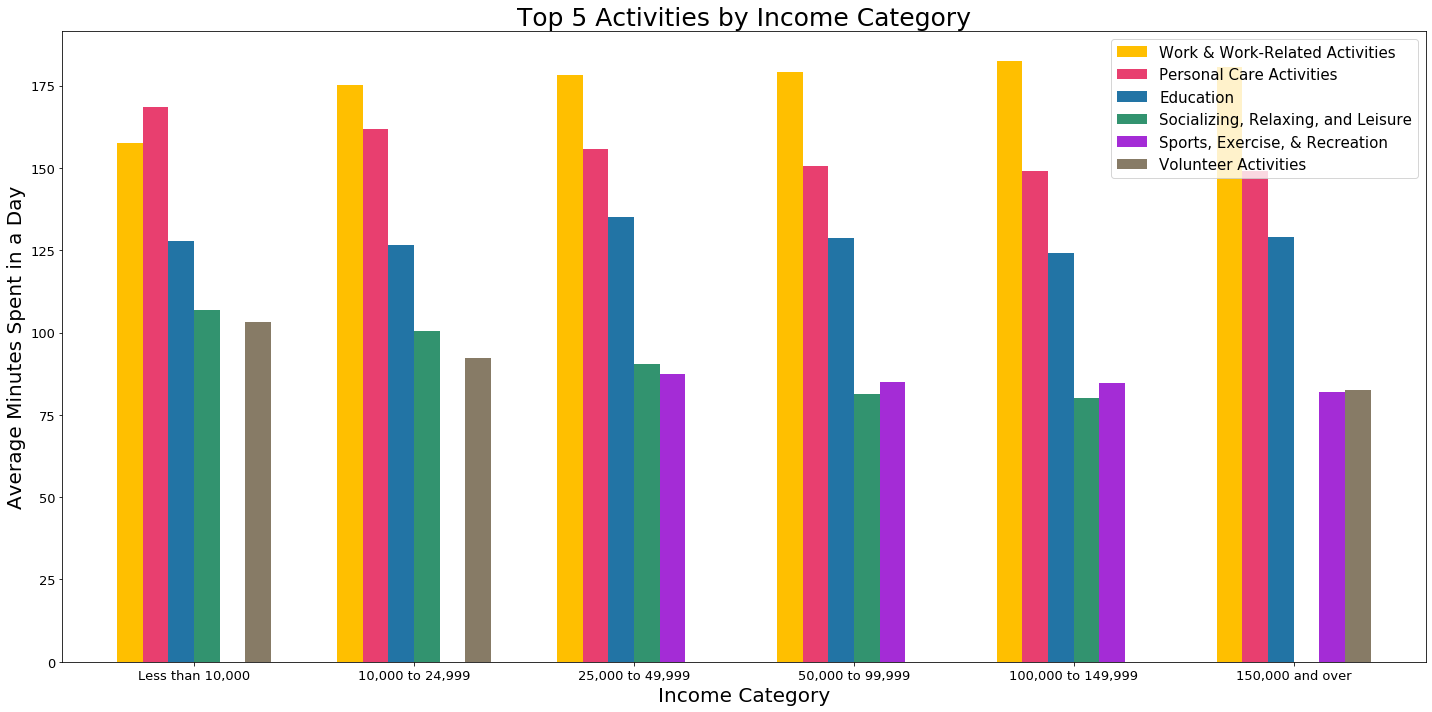

In [21]:
# add income category from respondent dataframe into activity dataframe
incomeResp = activityDataCleaned.merge(
    respondentDataCleaned[["unique id", "Yearly Family income category (in dollars)"]]
)

# get top 5 activities by average time grouped by income category using utility function
incomeRespGrouped = getAverageHoursGroupedBy(
    incomeResp, "Yearly Family income category (in dollars)", "Activity Category", 5
).unstack()

# reposition columns
incomeRespGrouped = incomeRespGrouped[
    [
        ("Weighted_Minutes", "Work & Work-Related Activities"),
        ("Weighted_Minutes", "Personal Care Activities"),
        ("Weighted_Minutes", "Education"),
        ("Weighted_Minutes", "Socializing, Relaxing, and Leisure"),
        ("Weighted_Minutes", "Sports, Exercise, & Recreation"),
        ("Weighted_Minutes", "Volunteer Activities"),
    ]
]

# reposition rows using index
incomeRespGrouped = incomeRespGrouped.reindex(
    [
        "Less than 10,000",
        "10,000 to 24,999",
        "25,000 to 49,999",
        "50,000 to 99,999",
        "100,000 to 149,999",
        "150,000 and over",
    ]
)

# plot bar chart
axincome = incomeRespGrouped.plot.bar(
    figsize=(20, 10),
    legend=True,
    width=0.7,
    fontsize=13,
    title="Top 5 Activities by Income Category",
    color=["#FFBF00", "#E83F6F", "#2274A5", "#32936F", "#A42CD6", "#877B66"],
    rot=0,
)

axincome.set_xlabel("Income Category", fontsize=20)
axincome.set_ylabel("Average Minutes Spent in a Day", fontsize=20)

# create legend
axincome.legend(
    [
        "Work & Work-Related Activities",
        "Personal Care Activities",
        "Education",
        "Socializing, Relaxing, and Leisure",
        "Sports, Exercise, & Recreation",
        "Volunteer Activities",
    ],
    loc="upper right",
    frameon=True,
    fontsize=15,
)
axincome.title.set_size(25)
plt.tight_layout()
plt.show()

From the above charts, we notice that people who earn less than 10,000 dollars annually spend most of their time on personal activities and the least time on work-related activities. Also, the top 5 activities of Work, Personal Care, Education, Socializing and Sports are common for respondents who earn between 25,000 to 150,000. People who earn more than 150,000 dollars have volunteering activities instead of socializing activities in their top 5 activities.

[Back to table of contents](#toc)

--------------------------
## 5.7. How do respondents in different age categories spend their time? <a id ="5.7"></a>

We want to know the top 5 activities in which most time was spent based on age category. We split the respondents into *4 categories*: less than 30 years of age, 30 to 40 years, 40 to 60 years and greater than 60 years of age.

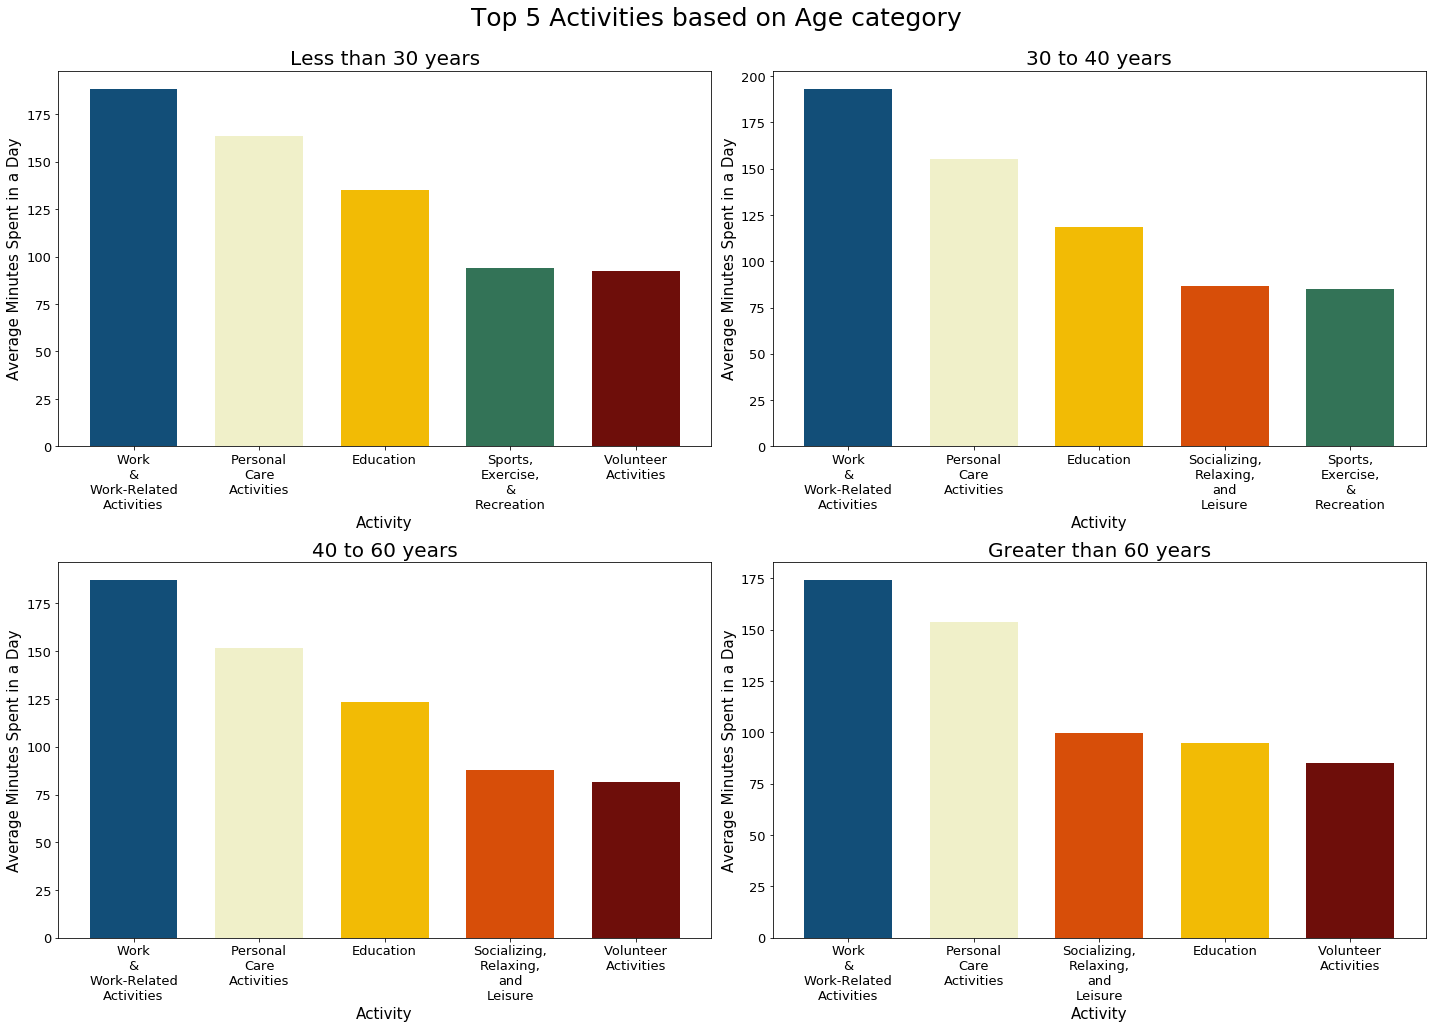

In [22]:
# add age from respondent dataframe into activity dataframe
ageResp = activityDataCleaned.merge(respondentDataCleaned[["unique id", "Age"]])

# split the respondents based on categories < 30, 30 to 40, 40 to 60, 60 >
ageResp["Age Category"] = np.where(
    ageResp["Age"] < 30,
    "<30",
    np.where(
        ageResp["Age"] < 40,
        "30 to 40",
        np.where(ageResp["Age"] < 60, "40 to 60", "60 >"),
    ),
)

# get top 5 activities by average time grouped by age category using utility function
ageRespGroup = getAverageHoursGroupedBy(ageResp, "Age Category", "Activity Category", 5)

# create subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2)

# subplot for less than 30 years
axlt30 = (
    ageRespGroup.loc["<30"]
    .reset_index()
    .plot.bar(
        figsize=(20, 15),
        legend=False,
        width=0.7,
        fontsize=13,
        ax=axes[0, 0],  # index for subplot
        x="Activity",
        y="Weighted_Minutes",
        title="Less than 30 years",
        color=["#124E78", "#F0F0C9", "#F2BB05", "#337357", "#6E0E0A"],
    )
)
axlt30.set_xticklabels(
    [
        # to wrap text, replace all spaces with new lines
        x.replace(" ", "\n")
        for x in ageRespGroup.loc["<30"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
axlt30.set_xlabel("Activity", fontsize=15)
axlt30.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
axlt30.title.set_size(20)

ax30to40 = (
    ageRespGroup.loc["30 to 40"]
    .reset_index()
    .plot.bar(
        legend=False,
        width=0.7,
        fontsize=13,
        ax=axes[0, 1],
        x="Activity",
        y="Weighted_Minutes",
        title="30 to 40 years",
        rot=0,
        color=["#124E78", "#F0F0C9", "#F2BB05", "#D74E09", "#337357"],
    )
)
ax30to40.set_xticklabels(
    [
        x.replace(" ", "\n")
        for x in ageRespGroup.loc["30 to 40"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
ax30to40.set_xlabel("Activity", fontsize=15)
ax30to40.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
ax30to40.title.set_size(20)

ax40to60 = (
    ageRespGroup.loc["40 to 60"]
    .reset_index()
    .plot.bar(
        legend=False,
        width=0.7,
        fontsize=13,
        ax=axes[1, 0],
        x="Activity",
        y="Weighted_Minutes",
        title="40 to 60 years",
        rot=0,
        color=["#124E78", "#F0F0C9", "#F2BB05", "#D74E09", "#6E0E0A"],
    )
)
ax40to60.set_xticklabels(
    [
        x.replace(" ", "\n")
        for x in ageRespGroup.loc["40 to 60"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
ax40to60.set_xlabel("Activity", fontsize=15)
ax40to60.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
ax40to60.title.set_size(20)


axgt60 = (
    ageRespGroup.loc["60 >"]
    .reset_index()
    .plot.bar(
        legend=False,
        width=0.7,
        fontsize=13,
        ax=axes[1, 1],
        x="Activity",
        y="Weighted_Minutes",
        title="Greater than 60 years",
        rot=0,
        color=["#124E78", "#F0F0C9", "#D74E09", "#F2BB05", "#6E0E0A"],
    )
)
axgt60.set_xticklabels(
    [
        x.replace(" ", "\n")
        for x in ageRespGroup.loc["60 >"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
axgt60.set_xlabel("Activity", fontsize=15)
axgt60.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
axgt60.title.set_size(20)
fig.suptitle("Top 5 Activities based on Age category", size=25)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

On examining the above subplots we learn that the top 5 activities based on age category are Work, Personal care, socializing, education and volunteering activities. We notice that respondents above 60 years don't do a lot of sports and exercise. Also, respondents below 30 years spend the highest amount of time in education and don't do a lot of socializing/ relaxing activities.

[Back to table of contents](#toc)

--------------------------
## 5.8. How do respondents spend their time, and with whom do they spend it based on Gender? <a id = "5.8"></a>

We want to know the top 5 activities in which most time was spent based on respondents gender.

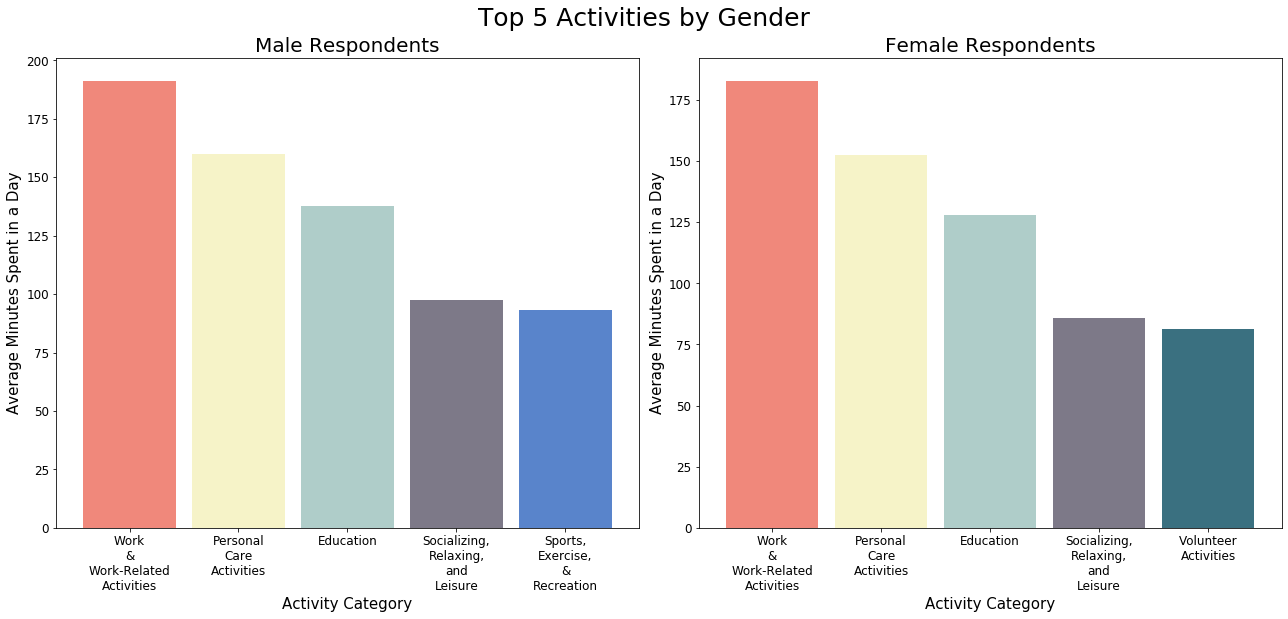

In [23]:
# add sex from respondent dataframe into activity dataframe
sexResp = activityDataCleaned.merge(respondentDataCleaned[["unique id", "Sex"]])

# get top 5 activities by average time grouped by sex using utility function
sexRespGroup = getAverageHoursGroupedBy(sexResp, "Sex", "Activity Category", 5)

# create subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))

# male subplot
axmale = (
    sexRespGroup.loc["Male"]
    .reset_index()
    .plot(
        kind="bar",
        x="Activity",
        y="Weighted_Minutes",
        ax=axes[0],  # index for subplot
        title="Male Respondents",
        legend=False,
        rot=90,
        fontsize=12,
        alpha=0.8,
        width=0.85,
        color=["#ED6A5A", "#F4F1BB", "#9BC1BC", "#5D576B", "#3066BE"],
    )
)
axmale.set_xticklabels(
    [
        # to wrap text, replace all spaces with new lines
        x.replace(" ", "\n")
        for x in sexRespGroup.loc["Male"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
axmale.set_xlabel("Activity Category", fontsize=15)
axmale.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
axes[0].title.set_size(20)

# female subplot
axfemale = (
    sexRespGroup.loc["Female"]
    .reset_index()
    .plot(
        kind="bar",
        x="Activity",
        y="Weighted_Minutes",
        ax=axes[1],  # index for subplot
        title="Female Respondents",
        legend=False,
        rot=90,
        fontsize=12,
        alpha=0.8,
        width=0.85,
        color=["#ED6A5A", "#F4F1BB", "#9BC1BC", "#5D576B", "#084C61"],
    )
)
axfemale.set_xticklabels(
    [
        # to wrap text, replace all spaces with new lines
        x.replace(" ", "\n")
        for x in sexRespGroup.loc["Female"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
axfemale.set_xlabel("Activity Category", fontsize=15)
axfemale.set_ylabel("Average Minutes Spent in a Day", fontsize=15)
axes[1].title.set_size(20)

# common title for subplot
fig.suptitle("Top 5 Activities by Gender", size=25)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We observe that work, personal care, education, socializing are common for both men and women as their top activities, but men have sports activities as one of their top activities whereas women have volunteering activities as one of their top activities.

We want to know the top 5 people interacted with while performing tasks based on respondents gender.

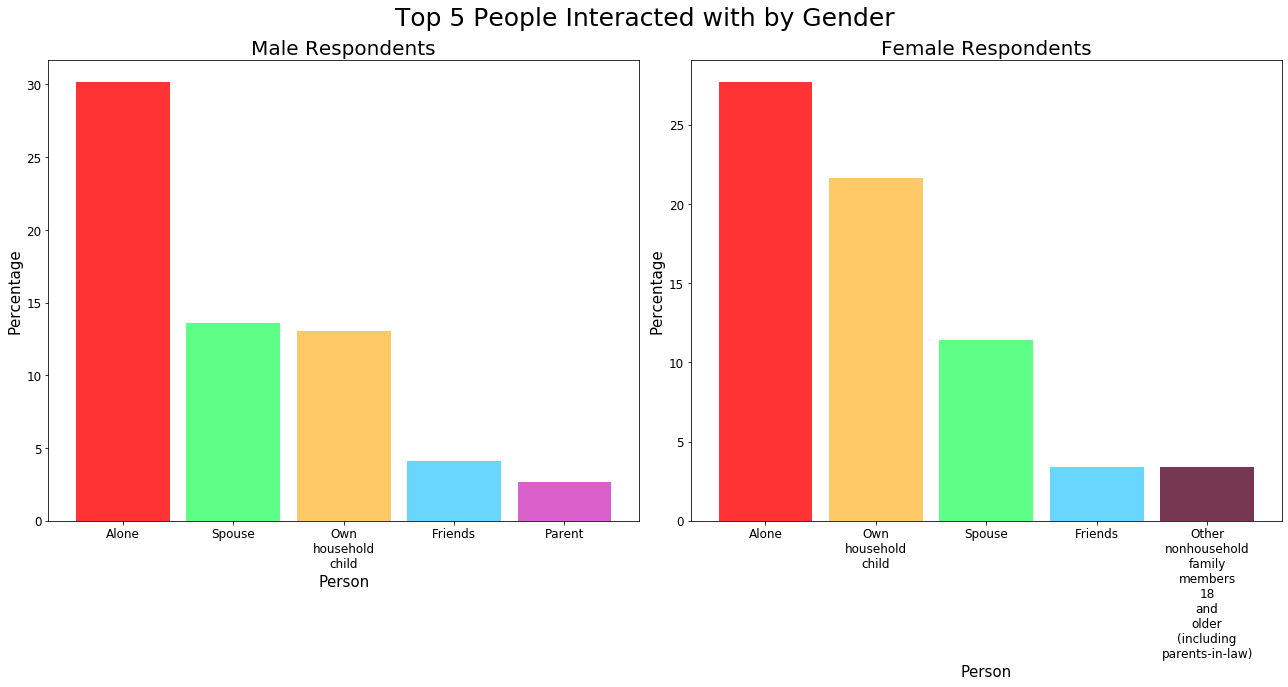

In [24]:
# get top 5 partner activities grouped by gender using utility function
sexRespGroupP = getParticipationPercentageGroupedBy(
    sexResp, "Sex", "Activity Partner", 5
)

# create subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))

# male subplot
axmale = (
    sexRespGroupP.loc["Male"]
    .reset_index()
    .plot(
        kind="bar",
        x="Activity",
        y="Percentage",
        ax=axes[0],  # index for subplot
        title="Male Respondents",
        legend=False,
        rot=90,
        fontsize=12,
        alpha=0.8,
        width=0.85,
        color=["red", "#35FF69", "#FFBC42", "#44CCFF", "#D138BF"],
    )
)
axmale.set_xticklabels(
    [
        # to wrap text, replace all spaces with new lines
        x.replace(" ", "\n")
        for x in sexRespGroupP.loc["Male"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
axmale.set_xlabel("Person", fontsize=15)
axmale.set_ylabel("Percentage", fontsize=15)
axes[0].title.set_size(20)

# female subplot
axfemale = (
    sexRespGroupP.loc["Female"]
    .reset_index()
    .plot(
        kind="bar",
        x="Activity",
        y="Percentage",
        ax=axes[1],  # index for subplot
        title="Female Respondents",
        legend=False,
        rot=90,
        fontsize=12,
        alpha=0.8,
        width=0.85,
        color=["red", "#FFBC42", "#35FF69", "#44CCFF", "#550527"],
    )
)
axfemale.set_xticklabels(
    [
        # to wrap text, replace all spaces with new lines
        x.replace(" ", "\n")
        for x in sexRespGroupP.loc["Female"].reset_index()["Activity"].to_list()
    ],
    rotation=0,
)
axfemale.set_xlabel("Person", fontsize=15)
axfemale.set_ylabel("Percentage", fontsize=15)
axes[1].title.set_size(20)

# common title for subplot
fig.suptitle("Top 5 People Interacted with by Gender", size=25)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

From above charts we notice that male and female respondents spend most of their time alone, but the second person most interacted with for male are their spouse and for female its their own child. Male also interact often with their parents, and females interact with household members older than 18 years(including parent-in-law).

[Back to table of contents](#toc)

## 6. Conclusion <a id="conclusion"></a>

To summarize from our analysis we found that most time spent doing an activity is work or work-related, followed by personal care which include grooming tasks, education which includes learning or taking classes and, socializing and relaxing activities. The most frequent activity is traveling, socializing, personal care, household, eating and drinking activities. We discovered that respondents perform majority of tasks at home, while driving in a vehicle,at workplace, at someone else's home.

Employed respondent spends most of their time doing work-related activities, whereas an unemployed respondent spends most of their time doing personal care activities. In the mining industry, the top 3 activities are personal care, work, and religious activities, and for construction industry personal care, work and Sports, Exercise and recreational activities were top 3. We also observe that respondents from mining and hospitality industries spend more time working in comparison to other industries.

We notice that respondents who have never been married spend most of their time in educational activities, whereas married respondents spend least amount of time in volunteering activities. Widowed respondents spend most of their time alone in comparison with other marital status respondents. Married respondents spend majority of their time with household kids and spouse. 

People who earn less than 10,000 dollars annually spend most of their time on personal activities and the least time on work-related activities. Also, the top 5 activities of Work, Personal Care, Education, Socializing and Sports are common for respondents who earn between 25,000 to 150,000. People who earn more than 150,000 dollars have volunteering activities instead of socializing activities in their top 5 activities.

Respondents below 30 years spend the highest amount of time in education and don't do a lot of socializing/ relaxing activities. 

We observe that work, personal care, education, socializing are common for both men and women as their top activities, but men have sports activities as one of their top activities whereas women have volunteering activities as one of their top activities. Male and female respondents spend most of their time alone, but the second person most interacted with for male are their spouse and for female its their own child.

Results of analysis for this project can be useful in making policies, set time limits, etc for the American demography.

[Back to table of contents](#toc)